In [1]:
import networkx as nx

from games import JOBST_GAME
from monte_carlo import combined_strategies
from network import SatisfiaMaximiserNetwork
from network.neighbourhood import NetworkByNeighborhood

In [2]:
%load_ext autoreload
%autoreload 2

# Testing the impact of the initial localization of SatisfIA agents on a neighborhood

## Objective
> We want to compare the trajectories of a popuplation of SatisfIA between the two following conditions:
> 1) Random assignment
> 2) Assignment to a neighborhood: we pick a starting node at random, assign it as SatisfIA, and then assign all SatisfIA agents to its neighbours, and expand the neighbourhood progressively

## Hypothesis
We expect that SatisfIA agents will have increased survival rate when they start in the same neighborhood

## Experiment

In [3]:
N_AGENTS = 50
EDGES_PER_NODE = 2

SATISFIA_SHARE = 0.4
N_GENERATIONS = 100

P_PLAY_GAME = 0.1
P_SOCIAL_LEARNING = 0.1

SEED = 1

barabasi_graph = nx.barabasi_albert_graph(n=N_AGENTS, m=EDGES_PER_NODE, seed=SEED)

### 1) Random assignment

#### One trajectory in detail

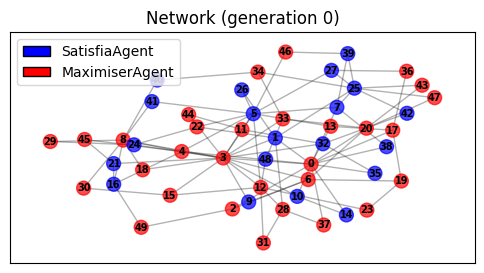

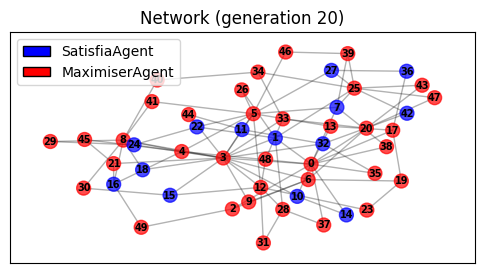

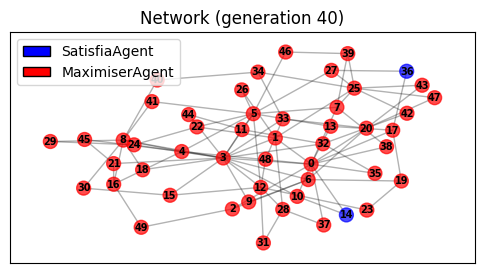

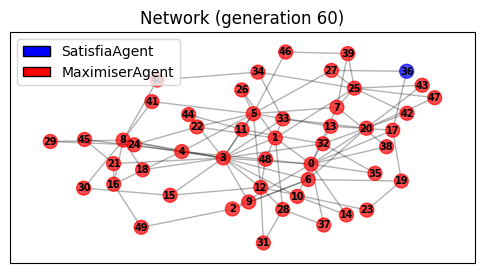

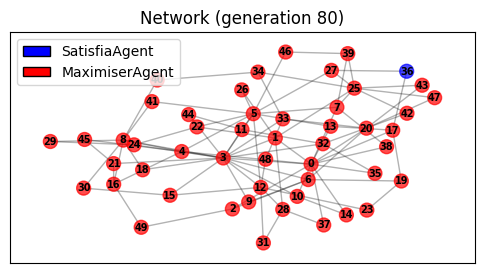

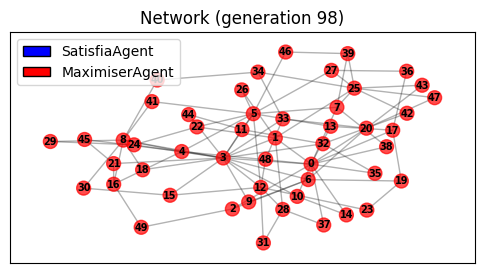

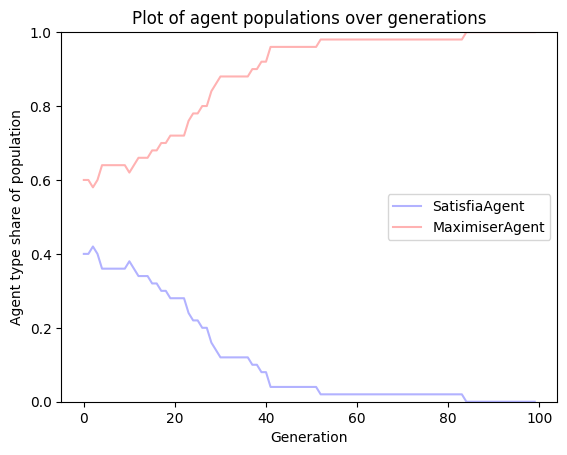

In [4]:
random_simulator = SatisfiaMaximiserNetwork(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=barabasi_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
_ = random_simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

#### Many trajectories with error plot

100%|██████████| 50/50 [00:03<00:00, 14.31it/s]


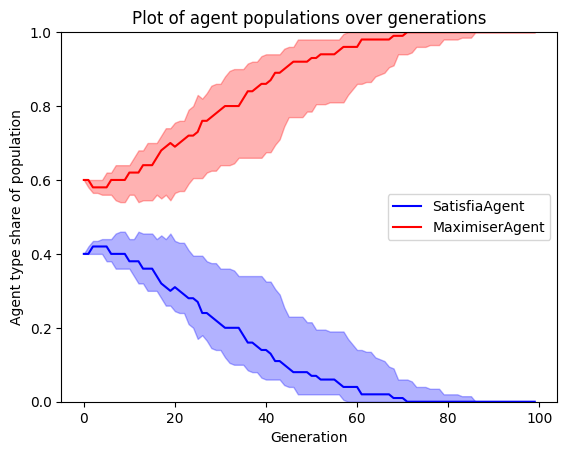

In [6]:
trajectories = random_simulator.get_iteration_repeats(P_PLAY_GAME, P_SOCIAL_LEARNING, n_repeats=50)
random_simulator.plot_agent_count_percentiles(trajectories)

### Assignment by neighbourhood

#### One trajectory in detail

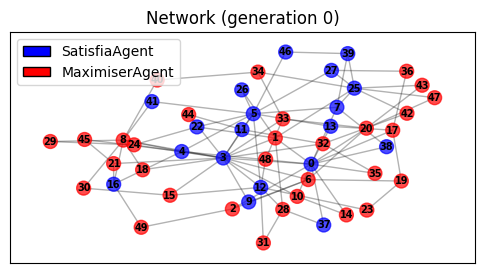

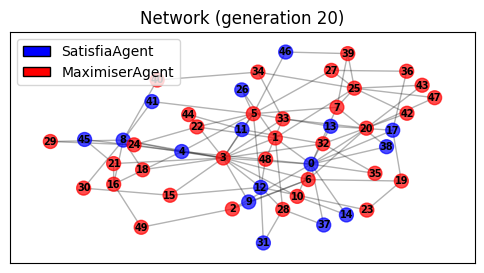

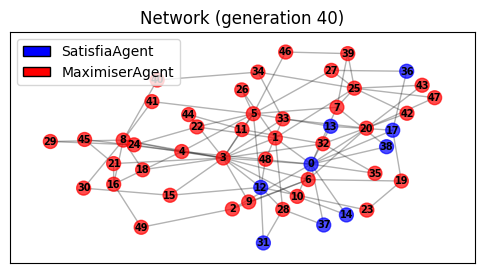

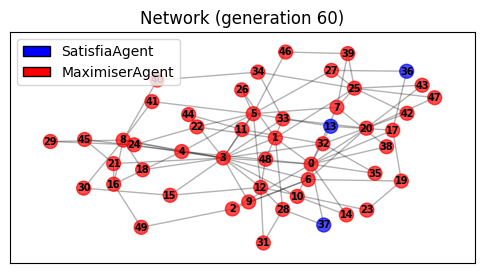

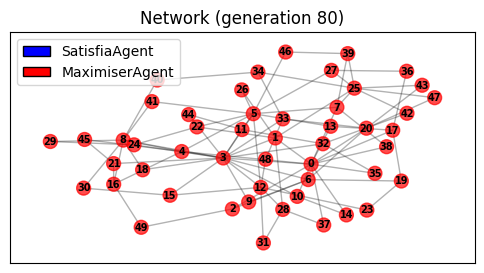

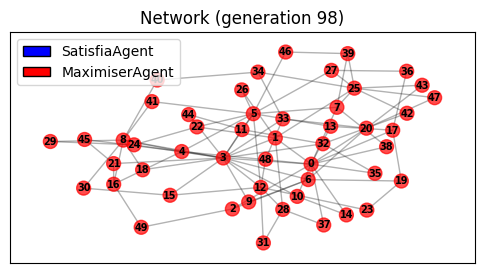

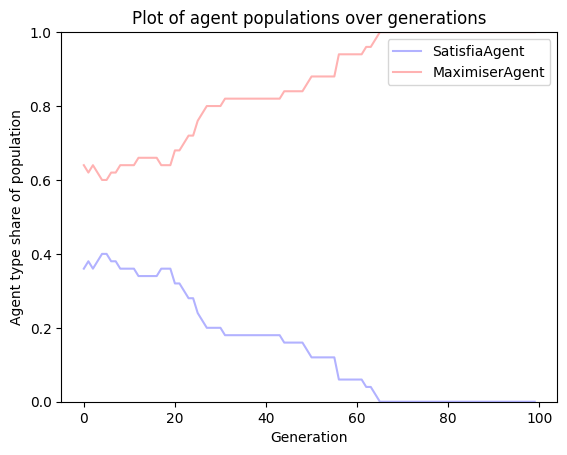

In [7]:
neighbour_simulator = NetworkByNeighborhood(JOBST_GAME, combined_strategies,
                                     satisfia_share=SATISFIA_SHARE,
                                     generations=N_GENERATIONS,
                                     base_graph=barabasi_graph, 
                                     draw_network_interval=N_GENERATIONS // 5)
_ = neighbour_simulator.iterate_generations(P_PLAY_GAME, P_SOCIAL_LEARNING, plot=True)

#### Many trajectoies with error plot

100%|██████████| 50/50 [00:03<00:00, 14.45it/s]


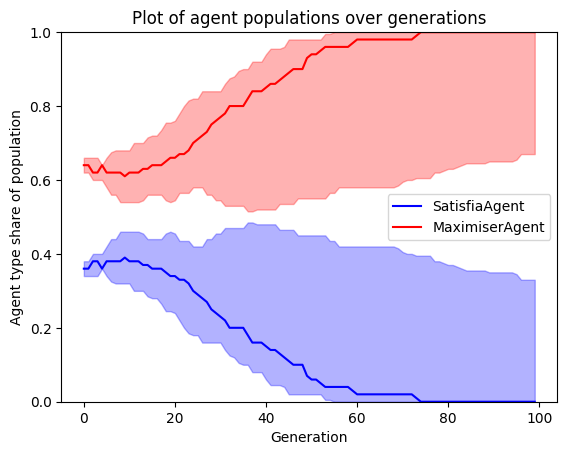

In [8]:
trajectories = neighbour_simulator.get_iteration_repeats(P_PLAY_GAME, P_SOCIAL_LEARNING, n_repeats=50)
neighbour_simulator.plot_agent_count_percentiles(trajectories)

## Conclusion

Neighborhood assignment considerably reduces the speed of extinction, but doesn't seem to prevent it.  
Locating the SatisfIA as neighbours also considerably increases the variablity of the trajectories.